In [9]:
import numpy as np

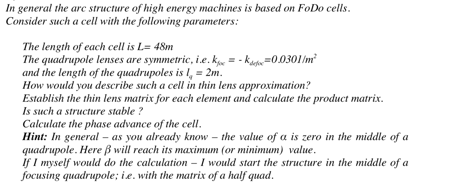

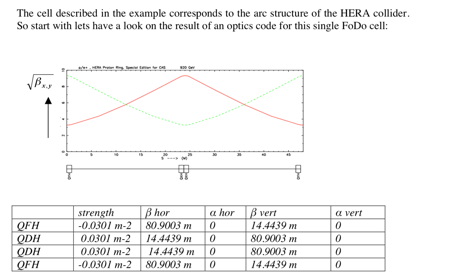

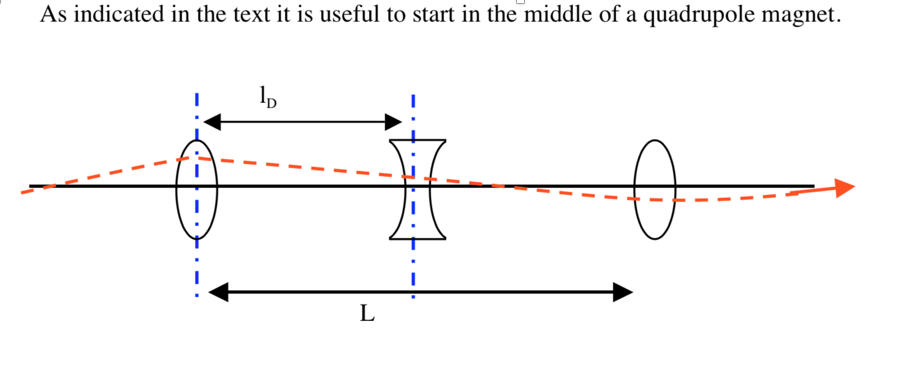

Establish the matrix for the first half cell in thin lens approximation:
\begin{equation}
M_{half\_cell}=M_{QD/2}\cdot M_{ld}\cdot M_{QF/2}
\end{equation}

\begin{equation}
M_{half\_cell}=\begin{bmatrix}
   1 & 0 \\
   \frac{1}{\tilde{f}} & 1
   \end{bmatrix}
   \begin{bmatrix}
   1 & l_d \\
   0 & 1
   \end{bmatrix}
   \begin{bmatrix}
   1 & 0 \\
   \frac{-1}{\tilde{f}} & 1
   \end{bmatrix}
\end{equation}  

where 
\begin{equation}
l_d=L/2 
\end{equation}
\begin{equation}
\tilde{f}=2f=\frac{1}{\frac{lq}{2}k}
\end{equation}

Multiplying we get:

\begin{equation}
M_{half\_cell}=\begin{bmatrix}
   1-\frac{l_d}{\tilde{f}} & l_d \\
   \frac{-l_d}{\tilde{f^2}} & 1+\frac{l_d}{\tilde{f}} 
   \end{bmatrix}
\end{equation}  


For the second half cell we do: f -> -f and multiply out to get the complete matrix
\begin{equation}
M_{cell}=\begin{bmatrix}
   1+\frac{l_d}{\tilde{f}} & l_d \\
   \frac{-l_d}{\tilde{f^2}} & 1-\frac{l_d}{\tilde{f}} 
   \end{bmatrix}
   \begin{bmatrix}
   1-\frac{l_d}{\tilde{f}} & l_d \\
   \frac{-l_d}{\tilde{f^2}} & 1+\frac{l_d}{\tilde{f}} 
   \end{bmatrix}
\end{equation} 

\begin{equation}
M_{cell}=\begin{bmatrix}
   1-\frac{2l_d^{2}}{\tilde{f}^2} & 2l_d(1+\frac{l_d}{\tilde{f}}) \\
   2(\frac{l_d^2}{\tilde{f}^3}-\frac{l_d}{\tilde{f}^2}) & 1-\frac{2l_d^{2}}{\tilde{f}^2}
   \end{bmatrix}
\end{equation} 



Is this structure stable?
Stability requires
\begin{equation}
|Trace(M)| \le 2
\end{equation}

In [53]:
abs_k=0.029465 #units: m-2
lq=2 #units: m
f=1/(abs_k*lq) #units: m
f_tilde=2*f
print("Focal length (f, f~) = ", f, f_tilde)

ld=48/2
trace_M=abs(2*(1-(2*ld**2/f_tilde**2)))

print("trace_M = ", trace_M)

Focal length (f, f~) =  16.96928559307653 33.93857118615306
trace_M =  0.0003010624000001627


Yes, the motion is stable

Obtain the phase advance of the cell.
For this we have to use the matrix in twiss form for a periodic structure:
\begin{equation}
M=\begin{bmatrix}
   cos\Psi_{cell}+\alpha\cdot sin\Psi_{cell} & \beta\cdot sin\Psi_{cell} \\
   -\gamma\cdot sin\Psi_{cell} & cos\Psi_{cell}-\alpha\cdot sin\Psi_{cell}
   \end{bmatrix}
\end{equation}
The phase advance can be calculated using the trace of the matrix:
\begin{equation}
Trace(M)=2\cdot cos\Psi_{cell} = 2-\frac{4l_d^2}{\tilde{f}^2}
\end{equation}


In [54]:
cos_psi_cell=1-2*ld**2/f_tilde**2
psi_cell=np.arccos(cos_psi_cell)
print("Phase advance (degrees) = ", psi_cell*180/np.pi)

Phase advance (degrees) =  90.00862480247763


Can you draw two particle trajectories that propagate through two FoDo cells, 
one starting with x=0, x'>0, and the other with x>0, x'=0?

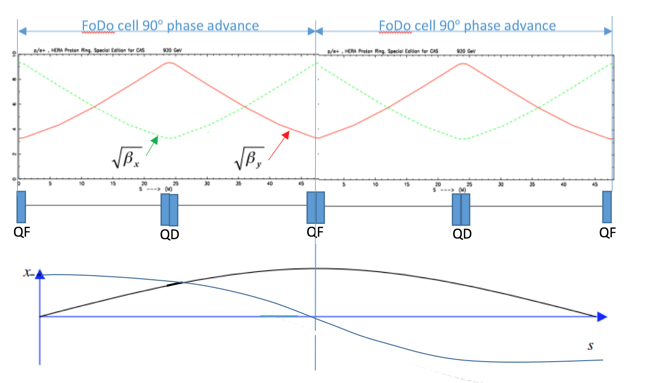

We are ask to calculate
\begin{equation}
\begin{bmatrix}
   x_{first\_fodo} \\
   x'_{first\_fodo}
\end{bmatrix} =
\begin{bmatrix}
   1-\frac{2l_d^{2}}{\tilde{f}^2} & 2l_d(1+\frac{l_d}{\tilde{f}}) \\
   2(\frac{l_d^2}{\tilde{f}^3}-\frac{l_d}{\tilde{f}^2}) & 1-\frac{2l_d^{2}}{\tilde{f}^2}
\end{bmatrix}
\begin{bmatrix}
   x_i \\
   x'_i
\end{bmatrix}
\end{equation}

In [56]:
# For the first particle:
x_i=0
x_prime_i=0.0001 #rad
v_i=[x_i,x_prime_i]

m11=1-(2*ld**2/f_tilde**2)
m12=2*ld*(1+ld/f_tilde)
m21=2*((ld**2/f_tilde**3)-(ld/f_tilde**2))
m_fodo=[[m11,m12],[m21,m11]]

v_after_first_fodo=np.dot(m_fodo,v_i)
v_after_second_fodo=np.dot(m_fodo,v_after_first_fodo)
print("Vector after first fodo = ", v_after_first_fodo)
print("Vector after second fodo = ", v_after_second_fodo)

Vector after first fodo =  [ 8.194368e-03 -1.505312e-08]
Vector after second fodo =  [-2.46701610e-06 -9.99999955e-05]


In [58]:
# For the first particle:
x_i=8.194368e-03
x_prime_i=0 #rad
v_i=[x_i,x_prime_i]

m11=1-(2*ld**2/f_tilde**2)
m12=2*ld*(1+ld/f_tilde)
m21=2*((ld**2/f_tilde**3)-(ld/f_tilde**2))
m_fodo=[[m11,m12],[m21,m11]]

v_after_first_fodo=np.dot(m_fodo,v_i)
v_after_second_fodo=np.dot(m_fodo,v_after_first_fodo)
print("Vector after first fodo = ", v_after_first_fodo)
print("Vector after second fodo = ", v_after_second_fodo)

Vector after first fodo =  [-1.23350805e-06 -9.99999977e-05]
Vector after second fodo =  [-8.19436763e-03  3.01062393e-08]
